<a href="https://colab.research.google.com/github/arielmpereira/Diplomatura-Ciencias-Datos/blob/main/TP1_Final.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>


#**Diplomatura en Ciencia de Datos, Aprendizaje Automático y sus Aplicaciones**

**Edición 2024**

---
## Trabajo práctico entregable - Parte 1

### Importación de librerías

In [1]:
import io
import matplotlib
import matplotlib.pyplot as plt
import numpy as np
import pandas as pd
import seaborn as sns

sns.set_context('notebook')


## Ejercicio 1 - Análisis descriptivo

Responder a la pregunta: **¿Cuáles son los lenguajes de programación asociados a los mejores salarios?**

Para ello:
1. Seleccionar las columnas relevantes para analizar.
2. Seleccionar las filas relevantes para analizar. Esto incluye la eliminación de valores extremos y erróneos, pero también puede enfocar el análisis en una sub-población. Por ejemplo, se pueden limitar a personas con un salario mayor que 100000 pesos, o a las personas que trabajan sólo en "Data Science", pero deben justificar su elección y reformular la pregunta inicial de ser necesario.
  * Obtener una lista de los lenguajes de programación más populares. Decidir cuántos y cuáles seleccionan para incluir en el análisis.
  * Para cada una de las otras columnas del punto anterior, elegir los rangos o valores seleccionan para incluir en el análisis.
3. Seleccionar métricas que ayuden a responder la pregunta, y los métodos para analizarlas. Elegir UNA de las siguientes opciones:
  * Comparar las distribuciones de salario para cada lenguaje utilizando visualizaciones. Como la visualización es el producto final, debe ser clara y mostrar información relevante.
  * Comparar medidas de estadística descriptiva sobre la distribución de salario para cada lenguaje. Sean creativos, la estadística descriptiva nos permite decir cosas como: "el 10% de los mejores sueldos los ganan, en su mayoría, programadores que saben kotlin!" (donde *mayoría* es un término medio engañoso que sólo significa más del 50%). Para comparar múltiples lenguajes, les recomendamos usar también visualizaciones.
  * Comparar probabilidades. Por ejemplo: "Si sabés Python o Java, tenés un 30% más de chances de ganar arriba de 100K".

Si lo consideran necesario, realicen varias iteraciones. Es decir, si encuentran que las distribuciones de los lenguajes de programación que seleccionaron inicialmente no son muy diferentes, pueden re-hacer el análisis usando sólo los lenguajes de programación que son diferentes.


### Carga del dataset

In [2]:
url = 'https://raw.githubusercontent.com/DiploDatos/AnalisisyVisualizacion/master/sysarmy_survey_2023_processed.csv'
raw_data = pd.read_csv(url)

### Curación de los datos

Dada la diversidad de sueldos por las distintas condiciones de contratación se decidió quedarse solamente con aquellos individuos que trabajen en dedicación **Full-Time** y con un contrato de planta permanente **Staff (planta permanente)**.

Véase el **ejercicio 2** para un análisis más profundo de la desición de restringir el dataset.

In [3]:
curated_data = raw_data.loc[(raw_data.work_dedication == "Full-Time") &
                            (raw_data.work_contract_type == "Staff (planta permanente)")]

### Outliers

Se requiere eliminar outliers superiores dada la presencia de sueldos altos que pueden entorpecer el análsisis y, además, pueden introducir información errónea. Para estos utilizamos el criterio del rango intercuartil.

$$max = q3 + 1.5*iqr$$

Es decir que se eliminan todos aquellos individios cuyos sueldos satisfacen
$$sueldo > max$$

Por otro lado se eliminan las entradas que poséan sueldos por debajo de **$300.000** por ser sueldos demasiado bajos y consideramos que pueden introducir error en la muestra.

In [4]:
################ SUELDO NETO ###############
# Cuartiles
q3 = curated_data['salary_monthly_NETO'].quantile(75/100)
q1 = curated_data['salary_monthly_NETO'].quantile(25/100)

# Rango intercuartil
iqr = q3 - q1

# Umbral inferior de outliers superiores
max= q3 + 1.5*iqr

################ SUELDO BRUTO ################
# Cuartiles
q3 = curated_data['salary_monthly_BRUTO'].quantile(75/100)
q1 = curated_data['salary_monthly_BRUTO'].quantile(25/100)

# Rango intercuartil
iqr = q3 - q1

# Umbral inferior de outliers superiores
max_b= q3 + 1.5*iqr

# Aplica criterios de eliminación de outliers
curated_data = curated_data.loc[(curated_data['salary_monthly_NETO'] < max) &
                                (curated_data['salary_monthly_NETO'] > 100000) &
                                (curated_data['salary_monthly_BRUTO'] < max_b) &
                                (curated_data['salary_monthly_BRUTO'] > 100000)]



### Columnas de interes

Para simplificar el análisis no se tienen en cuenta los sueldos en dólares ni los pagos extras.

Y tomaremos las siguientes columnas de interes:

> **salary_monthly_BRUTO** (*decimal*): El salario mensual bruto de la persona encuestada, es decir, antes de deducciones.

> **salary_monthly_NETO** (*decimal*): El salario mensual neto de la persona encuestada, es decir, después de deducciones.

> **profile_career** (string): La carrera o profesión de la persona encuestada.

> **tools_programming_languages** (string): Lenguajes y herramientas de programación utilizados en la labor profesional.

> **profile_studies_level_state** (*string*): El nivel educativo alcanzado por la persona encuestada.

> **profile_age**(entero): La edad de la persona encuestada.

In [5]:
cols_interes = [
    "salary_monthly_BRUTO",         #(decimal): El salario mensual bruto de la persona encuestada, es decir, antes de deducciones.
    "salary_monthly_NETO",          #(decimal): El salario mensual neto de la persona encuestada, es decir, después de deducciones.
    "profile_career",               #(string): La carrera o profesión de la persona encuestada.
    "tools_programming_languages",  #(string): Lenguajes y herramientas de programación utilizados en la labor profesional.
    "profile_studies_level_state",  #(string): El nivel educativo alcanzado por la persona encuestada.
    "profile_age"                   #(entero): La edad de la persona encuestada.
              ]

################ DESCARTE DE COLUMNAS ###############
curated_data = curated_data[cols_interes]
print(curated_data.describe())

curated_data.head(4)

       salary_monthly_BRUTO  salary_monthly_NETO  profile_age
count          3.554000e+03          3554.000000  3554.000000
mean           5.631544e+05        433201.084922    34.506190
std            2.790888e+05        182369.952813    10.542802
min            1.010000e+05        100545.000000    18.000000
25%            3.480152e+05        297250.000000    28.000000
50%            5.000000e+05        412000.000000    33.000000
75%            7.405512e+05        540000.000000    39.000000
max            1.450000e+06        992000.000000   366.000000


,salary_monthly_BRUTO,salary_monthly_NETO,profile_career,tools_programming_languages,profile_studies_level_state,profile_age
0,680000.0,520000.0,NaN,"Bash/Shell, Python",NaN,36
1,650000.0,520000.0,Licenciatura en Sistemas de Información,"Bash/Shell, CSS, HTML, Javascript, PHP, SQL, T...",Completo,45
2,125000.0,104000.0,NaN,"SQL, Oracle APEX, PL-SQL, SQL Developer",NaN,29
5,276000.0,229000.0,Analista Universitario de Sistemas,"Python, SQL",Completo,28


### Procesamiento de lista de lenguajes

En este apartado se desglosan las listas de lenguajes de programación para su análisis.

En primer lugar se obtiene una lista de todos los lenguajes que aparecen y su respectiva frecuencia. Tambíen se eliminan repetidos en el mismo individio, si los hubiera.

Nos quedamos con los más populares para simplificar el análisis.

#### Lista de lenguajes de programación

In [6]:
def split_languages(languages_str):
  if not isinstance(languages_str, str):
    return []
  # Remove 'other' option
  languages_str = languages_str.lower()\
    .replace('ninguno de los anteriores', '')
  # Split string into list of items
  # Remove spaces and commas for each item
  return [lang.strip().replace(',', '')
          for lang in languages_str.split()]

# Create a new column with the list of languages
curated_data.loc[:, 'cured_programming_languages'] = curated_data.tools_programming_languages.apply(split_languages)

#Obtenemos la lista de todos los lenguajes ingresados
tools_programming_languages = curated_data["cured_programming_languages"].to_list()

#Lista cruda de lenguajes sin repetición
lenguajes = list(set([e for l in tools_programming_languages for e in l]))

# Lista de elementos que no son lenguajes o herramientas de programación
no_lenguajes = ['-', 'ninguno', 'nan', 'no aplica a mi puesto', 'ninguna', 'no', 'en mi caso uso mínimo para cuestiones de ajustes',
                'no estoy dentro de tecnología', 'utilizamos lenguajes exclusivos de la herramienta de ibm que utilizamos']

# Los quitamos de la lista
lenguajes = list(set(lenguajes) - set(no_lenguajes))

print(lenguajes)

['', 'cg', 'stata', 'css', 'x++', 'appscript', 'dentro', 'xaml', 'progress', 'cuestiones', 'cloudformation', 'mi', 'scala', 'dax;', 'elixir', 'powerscript', 'kusto', 'estoy', 'xpath', 'oracle', 'pl/sql', 'mongo', 'visual', 'rust', 'siebel', 'edi', 'dax', 'bi', 'plsql', 'windows', 'ajustes', 'utilizo', 'tecnología', 'gosu', 'dart', 'utilizamos', 'snowdrop', 'qik', 'server', 'uso', 'terraform', 'sqr', 'en', 'typescript', 'javascript', 'ruby', 'gherkin', 'ansible', 'c', 'qlik', '9.0', 'mínimo', 'lenguajes', 'cloud', 'rpg', 'smalltalk', 'c#', 'lookerml', 'engine', 'vfp', 'postgresql', 'abap', 'vb', 'sas', 'la', 'para', 'php', 'power', 'que', 'glsl', 'fx', 'engines.', 'pl', 'perl', '.net', 'sense', 'aws', 'developer', 'solidity', 'powershell', 'xslt', 'ibm', 'outsystems', 'jenkin', 'salesforce', 'net', 'objective-c', 'tosca', 'mikrotik', 'java', 'bash', 'yaml', 'vba', 'salesforce/apex', 'vlocity', 'xsl', 'rpgle', 'hcl', 'azure', '(low', 'genexus', 'hlsl', 'natural', 'spl', 'pi/po', 'x', 'ar

#### Analisis de popularidad de lenguajes de programación


In [7]:
conteo = pd.DataFrame({"lenguaje": lenguajes, "conteo" : [0]*len(lenguajes)})
for lenguaje in lenguajes:
  conteo.loc[conteo["lenguaje"] == lenguaje, ["conteo"]] = curated_data["cured_programming_languages"].apply(lambda x: lenguaje in x ).sum()

conteo = conteo.sort_values(by = "conteo", ascending = False)
conteo.head(15)


,lenguaje,conteo
181,sql,1558
44,javascript,1293
137,python,999
173,html,955
89,java,677
3,css,641
43,typescript,570
140,bash/shell,545
74,.net,438
66,php,402


### Analsis de sueldos por lenguaje

Veamos el diagrama de boxplot para cada uno de los lenguajes

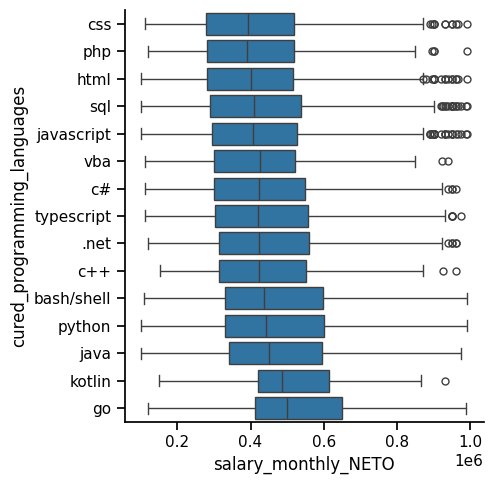

In [8]:
sueldos_leng = pd.DataFrame({'cured_programming_languages' : [], 'salary_monthly_NETO': []})

media = []
l_leng = list(conteo['lenguaje'].head(15))
for leng in list(conteo['lenguaje'].head(15)):
  media.append(curated_data['salary_monthly_NETO'][(curated_data['salary_monthly_NETO'] < max) & (curated_data['cured_programming_languages'].apply(lambda x: leng in x))].mean())

leng_med =  pd.DataFrame( {'lenguaje' : l_leng, 'media' : media}).sort_values(by='media')


for leng in list(leng_med['lenguaje']):
  df_aux = pd.DataFrame({'cured_programming_languages' : [], 'salary_monthly_NETO': []})
  df_aux['salary_monthly_NETO'] = curated_data['salary_monthly_NETO'][(curated_data['salary_monthly_NETO'] < max) & (curated_data['cured_programming_languages'].apply(lambda x: leng in x))]
  df_aux['cured_programming_languages'] = leng
  sueldos_leng = pd.concat([sueldos_leng,df_aux],axis=0, ignore_index = True)
  #plt.figure(figsize=(5, 1))
  #plt.title(leng)
  #sns.boxplot(x=df_aux)
  #sns.despine()

sueldos_leng.head(10)
g = sns.catplot(data=sueldos_leng, x='salary_monthly_NETO', y='cured_programming_languages',  kind="box" )
# g.set_yticklabels(list(sueldos_leng["cured_programming_languages"]))


#g = sns.catplot(data=dc, x=neto, y='profile_studies_level',  kind="box", order=dc['profile_studies_level'].value_counts().index )
#g.set_yticklabels(["Universitario", "Terciario", "Posgrado", "Maestría", "Secundario", "Doctorado", "Postdoctorado"])


# Ejercicio 2 - Densidades y varias variables

Responder a la pregunta general: **¿Que herramientas (prácticas y teóricas) són útiles para explorar la base, descubrir patrones, asociaciones?**

Para ello considere (igual al ejercicio Anterior):
1. Seleccionar las columnas relevantes para analizar.
2. Seleccionar las filas relevantes para analizar. Esto incluye la eliminación de valores extremos y erróneos, pero también puede enfocar el análisis en sub-poblaciones.

In [9]:
url = 'https://raw.githubusercontent.com/DiploDatos/AnalisisyVisualizacion/master/sysarmy_survey_2023_processed.csv'
df = pd.read_csv(url)

In [10]:
df.to_csv('/content/sample_data/data.csv')

In [11]:
df.columns

Index(['work_country', 'work_province', 'work_dedication',
       'work_contract_type', 'salary_monthly_BRUTO', 'salary_monthly_NETO',
       'salary_in_usd', 'salary_last_dollar_value', 'salary_has_bonus',
       'salary_bonus_tied_to', 'salary_inflation_adjustment',
       'salary_percentage_inflation_adjustment',
       '¿En qué mes fue el último ajuste?', 'salary_comparison_last_semester',
       '¿Contás con beneficios adicionales?', 'salary_satisfaction',
       'Trabajo de', 'profile_years_experience', 'work_years_in_company',
       'work_years_in_current_position', 'work_people_in_charge_of',
       'tools_platform', 'tools_programming_languages', 'tools_frameworks',
       'tools_data_bases', 'tools_qa_testing', 'company_employee_number',
       'work_work_modality',
       'Si trabajás bajo un esquema híbrido ¿Cuántos días a la semana vas a la oficina?',
       'company_recommended',
       '¿Qué tanto estás usando Copilot, ChatGPT u otras herramientas de IA para tu trabajo?

In [12]:
df_curated = df.loc[(df.work_dedication == "Full-Time") & (df.work_contract_type == "Staff (planta permanente)"),['work_dedication',
       'work_contract_type', 'salary_monthly_BRUTO', 'salary_monthly_NETO',
       'salary_in_usd',
       'Trabajo de', 'profile_years_experience', 'profile_studies_level',
      'profile_age',
       'profile_gender']]

In [13]:
df_curated.head()

,work_dedication,work_contract_type,salary_monthly_BRUTO,salary_monthly_NETO,salary_in_usd,Trabajo de,profile_years_experience,profile_studies_level,profile_age,profile_gender
0,Full-Time,Staff (planta permanente),680000.0,520000.0,NaN,Infosec,10.0,NaN,36,Varón Cis
1,Full-Time,Staff (planta permanente),650000.0,520000.0,NaN,DevOps Engineer,23.0,Maestría,45,Varón Cis
2,Full-Time,Staff (planta permanente),125000.0,104000.0,NaN,Developer,0.0,NaN,29,Mujer Cis
5,Full-Time,Staff (planta permanente),276000.0,229000.0,NaN,Data Engineer,1.0,Universitario,28,Varón Cis
6,Full-Time,Staff (planta permanente),340000.0,250000.0,NaN,Developer,2.0,NaN,28,Varón Cis


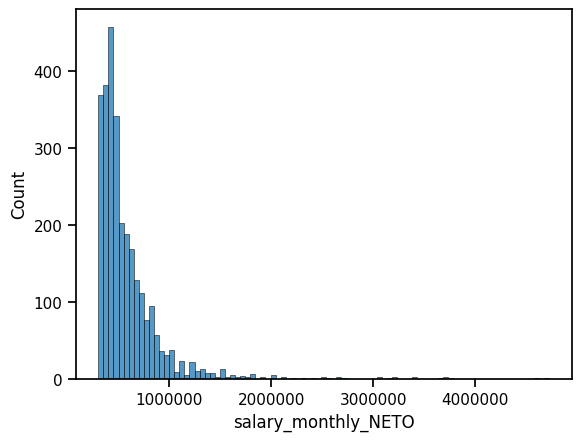

In [14]:
sns.histplot(x=df_curated.salary_monthly_NETO[(df_curated.salary_monthly_NETO < 5000000) & (df_curated.salary_monthly_NETO > 300000)], binwidth=50000)

plt.ticklabel_format(style='plain', axis='x')

In [15]:
df_curated.describe()

,salary_monthly_BRUTO,salary_monthly_NETO,profile_years_experience,profile_age
count,4.159000e+03,4.045000e+03,4159.000000,4159.000000
mean,6.205580e+05,4.770453e+05,8.170955,34.642222
std,5.664662e+05,5.247820e+05,7.657202,10.243402
min,1.000000e+00,7.556000e+01,0.000000,18.000000
25%,3.260000e+05,2.800000e+05,2.000000,28.000000
50%,5.050000e+05,4.127660e+05,5.000000,33.000000
75%,7.800000e+05,5.650000e+05,12.000000,39.000000
max,1.140000e+07,2.229600e+07,99.000000,366.000000


### a) Densidad conjunta

**Que herramientas visuales y modelos puede utilizar para estudiar la distribución y comportamiento de sus datos?**

RTA: La distribución de los datos puede ser estudiada a traves de la
realización de gráficos adecuados segun el tipo y cantidad de variables en estudio: diagrama de dispersión, histogramas de frecuencias, box plots, etc.

**Elija tres variables numéricas y 2 variables categóricas. Visualice la base según varias de las variables elegidas. Puede describir de alguna forma el comportamiento de sus datos? Que herramientas utilizaría? Describa**




El umbral maximo es 992500.0
El umbral mínimo es -147500.0
<class 'pandas.core.frame.DataFrame'>
Index: 4159 entries, 0 to 5803
Data columns (total 10 columns):
 #   Column                    Non-Null Count  Dtype  
---  ------                    --------------  -----  
 0   work_dedication           4159 non-null   object 
 1   work_contract_type        4159 non-null   object 
 2   salary_monthly_BRUTO      4159 non-null   float64
 3   salary_monthly_NETO       4045 non-null   float64
 4   salary_in_usd             1087 non-null   object 
 5   Trabajo de                4159 non-null   object 
 6   profile_years_experience  4159 non-null   float64
 7   profile_studies_level     1870 non-null   object 
 8   profile_age               4159 non-null   int64  
 9   profile_gender            4159 non-null   object 
dtypes: float64(3), int64(1), object(6)
memory usage: 357.4+ KB


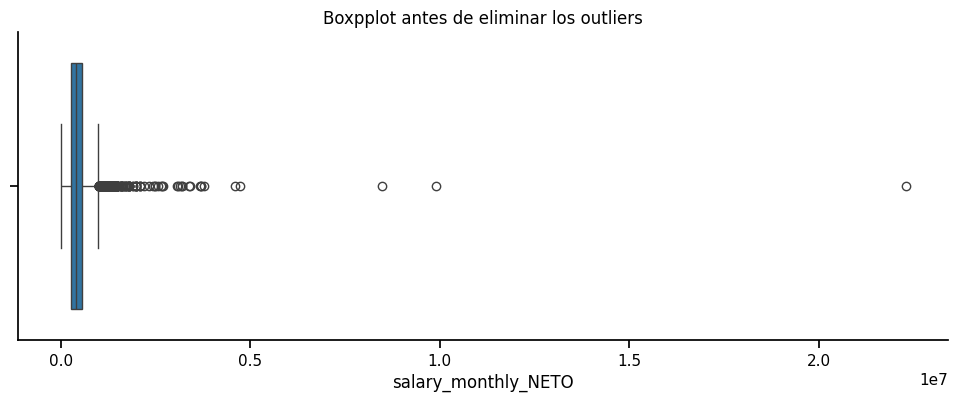

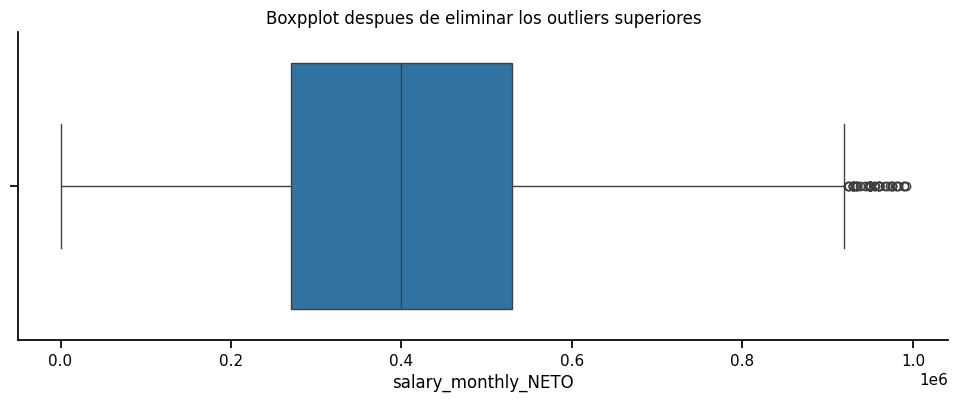

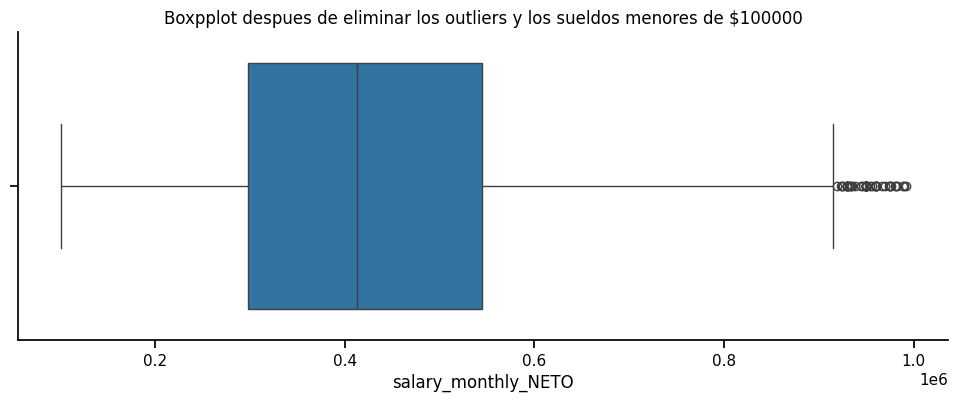

In [16]:
plt.figure(figsize=(12, 4))
plt.title('Boxpplot antes de eliminar los outliers')
sns.boxplot(x=df_curated['salary_monthly_NETO'])
sns.despine()

#Calculamos el umbral maximo, que luego lo usaremos para definir outliers

q3 = df_curated['salary_monthly_NETO'].quantile(75/100)
q1 = df_curated['salary_monthly_NETO'].quantile(25/100)
iqr = q3 - q1

min= q1-1.5*iqr
max= q3+1.5*iqr
print(f'El umbral maximo es {max}')
print(f'El umbral mínimo es {min}')

plt.figure(figsize=(12, 4))
plt.title('Boxpplot despues de eliminar los outliers superiores')
sns.boxplot(x=df_curated['salary_monthly_NETO'][(df_curated['salary_monthly_NETO'] < max)])
sns.despine()


plt.figure(figsize=(12, 4))
plt.title('Boxpplot despues de eliminar los outliers y los sueldos menores de $100000')
sns.boxplot(x=df_curated['salary_monthly_NETO'][(df_curated['salary_monthly_NETO'] < max) & (df_curated['salary_monthly_NETO'] > 100000)])
sns.despine()

df_curated.info()

El umbral maximo es 992500.0
El umbral mínimo es -147500.0
<class 'pandas.core.frame.DataFrame'>
Index: 4159 entries, 0 to 5803
Data columns (total 10 columns):
 #   Column                    Non-Null Count  Dtype  
---  ------                    --------------  -----  
 0   work_dedication           4159 non-null   object 
 1   work_contract_type        4159 non-null   object 
 2   salary_monthly_BRUTO      4159 non-null   float64
 3   salary_monthly_NETO       4045 non-null   float64
 4   salary_in_usd             1087 non-null   object 
 5   Trabajo de                4159 non-null   object 
 6   profile_years_experience  4159 non-null   float64
 7   profile_studies_level     1870 non-null   object 
 8   profile_age               4159 non-null   int64  
 9   profile_gender            4159 non-null   object 
dtypes: float64(3), int64(1), object(6)
memory usage: 357.4+ KB


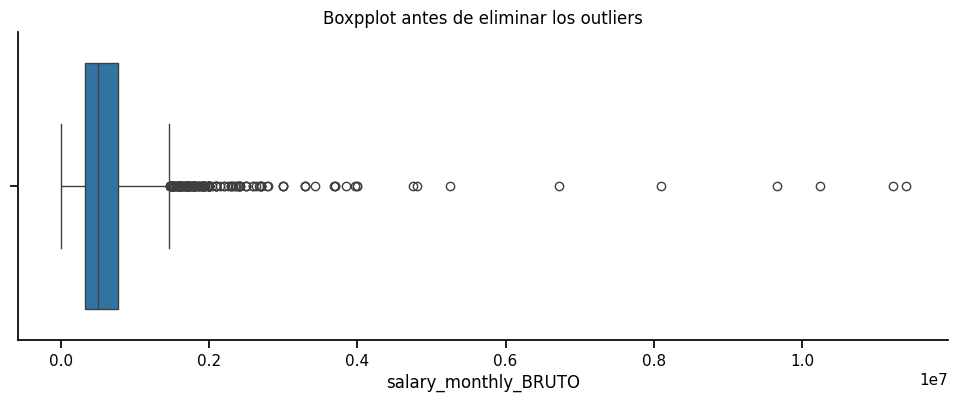

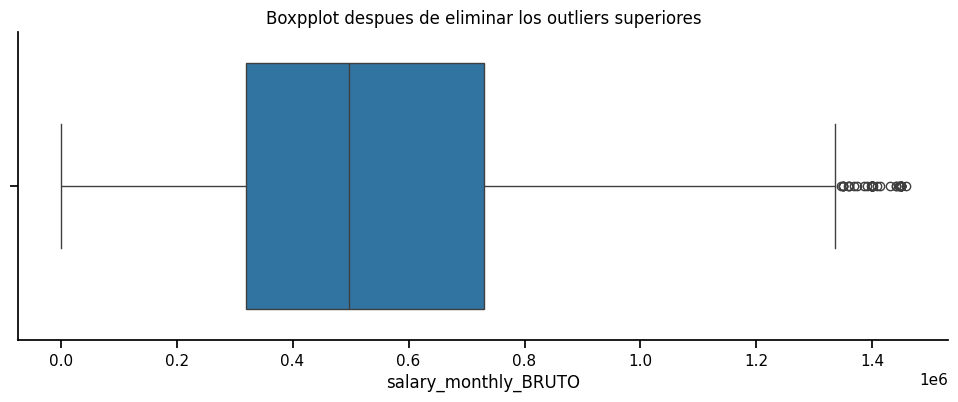

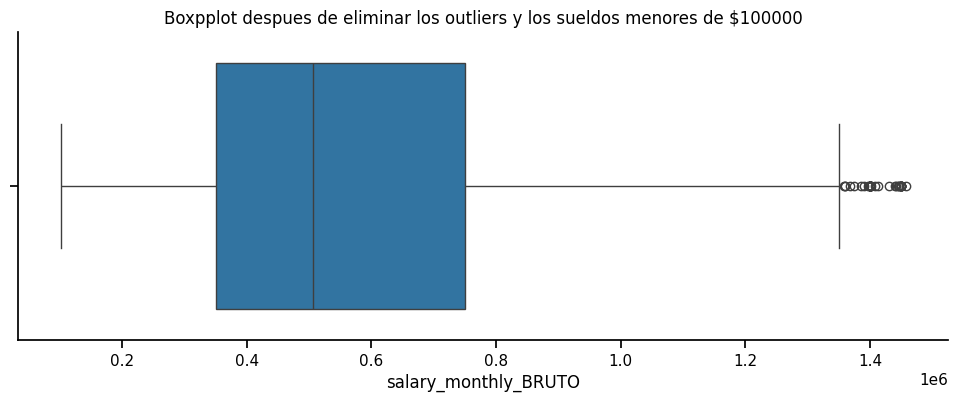

In [17]:
plt.figure(figsize=(12, 4))
plt.title('Boxpplot antes de eliminar los outliers')
sns.boxplot(x=df_curated['salary_monthly_BRUTO'])
sns.despine()

#Calculamos el umbral maximo, que luego lo usaremos para definir outliers

q3 = df_curated['salary_monthly_BRUTO'].quantile(75/100)
q1 = df_curated['salary_monthly_BRUTO'].quantile(25/100)
iqr = q3 - q1

min_b= q1-1.5*iqr
max_b= q3+1.5*iqr
print(f'El umbral maximo es {max}')
print(f'El umbral mínimo es {min}')

plt.figure(figsize=(12, 4))
plt.title('Boxpplot despues de eliminar los outliers superiores')
sns.boxplot(x=df_curated['salary_monthly_BRUTO'][(df_curated['salary_monthly_BRUTO'] < max_b)])
sns.despine()


plt.figure(figsize=(12, 4))
plt.title('Boxpplot despues de eliminar los outliers y los sueldos menores de $100000')
sns.boxplot(x=df_curated['salary_monthly_BRUTO'][(df_curated['salary_monthly_BRUTO'] < max_b) & (df_curated['salary_monthly_BRUTO'] > 100000)])
sns.despine()

df_curated.info()

In [18]:
dc = df_curated.loc[(df_curated['salary_monthly_NETO'] < max) & (df_curated['salary_monthly_NETO'] > 100000) & (df_curated['salary_monthly_BRUTO'] < max_b) & (df_curated['salary_monthly_BRUTO'] > 100000), ['work_dedication',
       'work_contract_type', 'salary_monthly_BRUTO', 'salary_monthly_NETO',
       'salary_in_usd',
       'Trabajo de', 'profile_years_experience', 'profile_studies_level',
      'profile_age',
       'profile_gender']]
dc.describe()
dc.head()

,work_dedication,work_contract_type,salary_monthly_BRUTO,salary_monthly_NETO,salary_in_usd,Trabajo de,profile_years_experience,profile_studies_level,profile_age,profile_gender
0,Full-Time,Staff (planta permanente),680000.0,520000.0,NaN,Infosec,10.0,NaN,36,Varón Cis
1,Full-Time,Staff (planta permanente),650000.0,520000.0,NaN,DevOps Engineer,23.0,Maestría,45,Varón Cis
2,Full-Time,Staff (planta permanente),125000.0,104000.0,NaN,Developer,0.0,NaN,29,Mujer Cis
5,Full-Time,Staff (planta permanente),276000.0,229000.0,NaN,Data Engineer,1.0,Universitario,28,Varón Cis
6,Full-Time,Staff (planta permanente),340000.0,250000.0,NaN,Developer,2.0,NaN,28,Varón Cis


In [19]:
dc.head()

,work_dedication,work_contract_type,salary_monthly_BRUTO,salary_monthly_NETO,salary_in_usd,Trabajo de,profile_years_experience,profile_studies_level,profile_age,profile_gender
0,Full-Time,Staff (planta permanente),680000.0,520000.0,NaN,Infosec,10.0,NaN,36,Varón Cis
1,Full-Time,Staff (planta permanente),650000.0,520000.0,NaN,DevOps Engineer,23.0,Maestría,45,Varón Cis
2,Full-Time,Staff (planta permanente),125000.0,104000.0,NaN,Developer,0.0,NaN,29,Mujer Cis
5,Full-Time,Staff (planta permanente),276000.0,229000.0,NaN,Data Engineer,1.0,Universitario,28,Varón Cis
6,Full-Time,Staff (planta permanente),340000.0,250000.0,NaN,Developer,2.0,NaN,28,Varón Cis


### b) Asociación

* Necesitamos decidir si sacar o no la columna de salario bruto. Para hacer la encuesta más simple.
¿Existe una correlación entre el salario bruto y el neto? Que abordaje y medidas usaría

RTA: Se realizó un análisis gráfico de dispersion entre ambas variables, identificando a priori una posible relacion lineal.
Luego se calculó el coeficiente de correlacion lineal con un resultado de 0.92, indicando alta y positiva correlacion lineal entre salario bruto y neto. Este resultado demuestra la posibilidad de quitar la pregunta del salario bruto, sin alterar los posibles analisis que se realicen con la variable de salario neto.



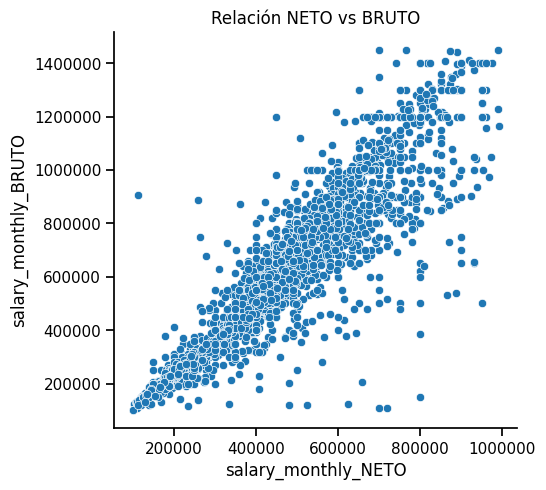

In [20]:
neto = dc['salary_monthly_NETO']
bruto = dc['salary_monthly_BRUTO']
edad = dc['profile_age']
exp = dc['profile_years_experience']
genero = dc['profile_gender']
trabajo = dc['Trabajo de']

sns.relplot(x = neto , y = bruto)
plt.title("Relación NETO vs BRUTO")
plt.ticklabel_format(style='plain', axis='x')
plt.ticklabel_format(style='plain', axis='y')
sns.despine()

In [21]:
matcov=np.cov(bruto,neto)
print('matriz de varianza covarianza:','\n',matcov,'\n')

corr=np.corrcoef(bruto, neto)
print('matriz de correlaciones: \n ', corr,'\n')

print('correlación entra ambas variables: ',corr[0,1],'\n')


print(neto.describe().apply(lambda s: '{0:.2f}'.format(s)), '\n')
print(bruto.describe().apply(lambda s: '{0:.2f}'.format(s)))

matriz de varianza covarianza: 
 [[7.78905461e+10 4.66843952e+10]
 [4.66843952e+10 3.32587997e+10]] 

matriz de correlaciones: 
  [[1.         0.91722541]
 [0.91722541 1.        ]] 

correlación entra ambas variables:  0.9172254092864607 

count      3554.00
mean     433201.08
std      182369.95
min      100545.00
25%      297250.00
50%      412000.00
75%      540000.00
max      992000.00
Name: salary_monthly_NETO, dtype: object 

count       3554.00
mean      563154.38
std       279088.78
min       101000.00
25%       348015.25
50%       500000.00
75%       740551.25
max      1450000.00
Name: salary_monthly_BRUTO, dtype: object


In [22]:

from scipy import stats as st

col_numericas = [bruto, neto, edad, exp]
col_nombres = ['Salario bruto', 'Salario neto', 'Edad', 'Años de experiencia']
medidas_dispersion = ['Media', 'Mediana', 'Moda', 'Desviación estándar']
dispersion = [( np.mean(c), np.median(c), st.mode(c)[0], np.std(c)) for c in col_numericas]
it_dispersion = zip(col_nombres, dispersion)
lista_dispersion = list(it_dispersion)
dict_dispersion = {key: value for key, value in lista_dispersion}
df_dispersion = pd.DataFrame(dict_dispersion, index=medidas_dispersion)

# print(lista_dispersion)


df_dispersion

,Salario bruto,Salario neto,Edad,Años de experiencia
Media,563154.376986,433201.084922,34.506190,7.905796
Mediana,500000.000000,412000.000000,33.000000,5.000000
Moda,500000.000000,500000.000000,30.000000,2.000000
Desviación estándar,279049.511283,182344.294008,10.541319,7.415209


<Axes: xlabel='salary_monthly_NETO', ylabel='salary_monthly_BRUTO'>

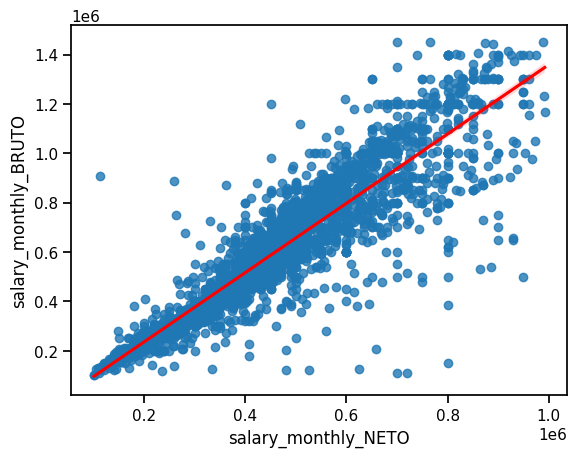

In [23]:
sns.regplot(x=neto, y=bruto, data=dc, fit_reg=True, x_ci="sd", line_kws=dict(color="r"))

### c) Densidad condicional

Estudie la distribución del salario según el nivel de estudio.

Separe la población según el nivel de estudio (elija dos subpoblaciones numerosas) y grafique de manera comparativa ambos histogramas de la variable `'salary_monthly_NETO'`
¿Considera que ambas variables son independientes?
¿Qué analizaría al respecto?

Calcule medidas de centralización y dispersión para cada subpoblación






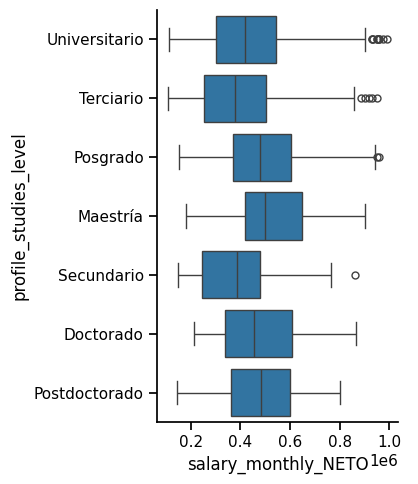

In [24]:
# figsize = (12, 4 * len(dc['profile_studies_level'].unique()))
# plt.figure(figsize=figsize)
g = sns.catplot(data=dc, x=neto, y='profile_studies_level',  kind="box", order=dc['profile_studies_level'].value_counts().index )
g.set_yticklabels(["Universitario", "Terciario", "Posgrado", "Maestría", "Secundario", "Doctorado", "Postdoctorado"])
# sns.despine(top=True, right=True, bottom=True, left=True)

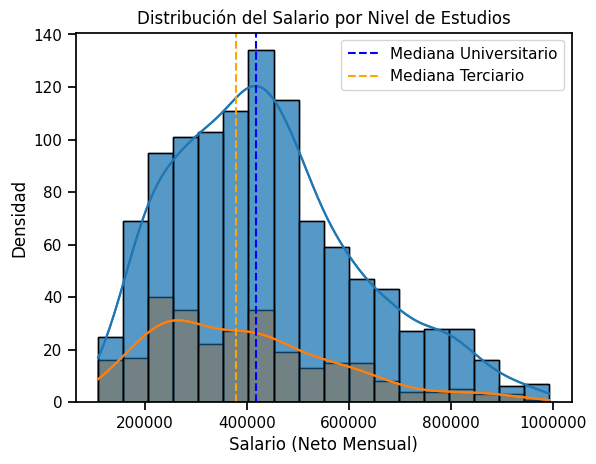

In [25]:
# Calculate medians for each education level
universitario_median = dc[dc['profile_studies_level'] == "Universitario"]['salary_monthly_NETO'].median()
terciario_median = dc[dc['profile_studies_level'] == "Terciario"]['salary_monthly_NETO'].median()

# Create the histogram with kernel density estimation (KDE)
sns.histplot(
    x=dc['salary_monthly_NETO'][(dc['profile_studies_level'] == "Universitario") | (dc['profile_studies_level'] == 'Terciario')],
    binwidth=50000,
    hue=dc['profile_studies_level'][(dc['profile_studies_level'] == "Universitario") | (dc['profile_studies_level'] == 'Terciario')],
    kde=True
)# Calcula las medianas para cada nivel de estudios
mediana_universitario = dc[dc['profile_studies_level'] == "Universitario"]['salary_monthly_NETO'].median()
mediana_terciario = dc[dc['profile_studies_level'] == "Terciario"]['salary_monthly_NETO'].median()

# Crea el histograma con estimación de densidad del núcleo (KDE)
sns.histplot(
    x=dc['salary_monthly_NETO'][(dc['profile_studies_level'] == "Universitario") | (dc['profile_studies_level'] == 'Terciario')],
    binwidth=50000,
    hue=dc['profile_studies_level'][(dc['profile_studies_level'] == "Universitario") | (dc['profile_studies_level'] == 'Terciario')],
    kde=True
)

# Agrega líneas verticales para las medianas
plt.axvline(x=mediana_universitario, color='blue', linestyle='dashed', label='Mediana Universitario')
plt.axvline(x=mediana_terciario, color='orange', linestyle='dashed', label='Mediana Terciario')

# Personaliza el gráfico
plt.ticklabel_format(style='plain', axis='x')  # Formatea etiquetas del eje X
plt.xlabel('Salario (Neto Mensual)')
plt.ylabel('Densidad')
plt.title('Distribución del Salario por Nivel de Estudios')
plt.legend()  # Agrega leyenda para las medianas

plt.show()

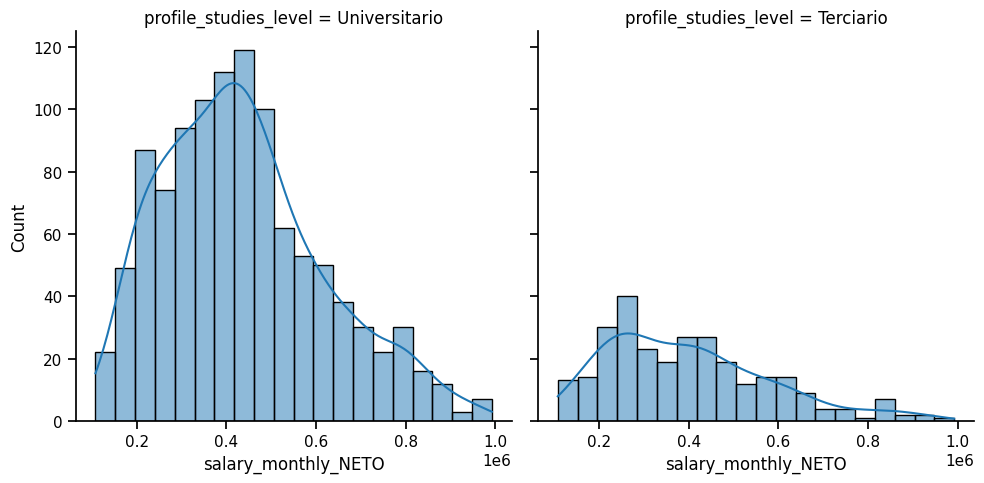

In [26]:
uni_ter = dc['profile_studies_level'][(dc['profile_studies_level'] == "Universitario") | (dc['profile_studies_level'] == 'Terciario' ) ]
neto_uni_ter = dc['salary_monthly_NETO'][(dc['profile_studies_level'] == "Universitario") | (dc['profile_studies_level'] == 'Terciario' ) ]

sns.displot(dc, x=neto_uni_ter, col=uni_ter, kde=True)

In [28]:
col_numericas = [neto[dc['profile_studies_level'] == "Universitario"], neto[dc['profile_studies_level'] == "Terciario"]]
col_nombres = ['Salario Neto Universitarios', "Salario Neto Terciarios"]
medidas_dispersion = ['Media', 'Mediana', 'Moda', 'Desviación estándar']
dispersion = [( np.mean(c), np.median(c), st.mode(c)[0], np.std(c)) for c in col_numericas]
it_dispersion = zip(col_nombres, dispersion)
lista_dispersion = list(it_dispersion)
dict_dispersion = {key: value for key, value in lista_dispersion}
df_dispersion = pd.DataFrame(dict_dispersion, index=medidas_dispersion)

# print(lista_dispersion)

df_dispersion

,Salario Neto Universitarios,Salario Neto Terciarios
Media,437067.733860,397380.851028
Mediana,417799.000000,379000.000000
Moda,500000.000000,250000.000000
Desviación estándar,181198.851133,181635.681777


In [29]:
filtered_data = dc[dc['profile_studies_level'].isin(['Universitario', 'Terciario'])]

universitario = filtered_data[filtered_data['profile_studies_level'] == 'Universitario']['salary_monthly_NETO']
terciario = filtered_data[filtered_data['profile_studies_level'] == 'Terciario']['salary_monthly_NETO']
universitario_mean = universitario.mean()
terciario_mean = terciario.mean()

u, pval = st.mannwhitneyu(universitario, terciario)


pooled_std = np.sqrt(((universitario.var() + terciario.var()) / 2))

hedges_d = (universitario_mean - terciario_mean) / pooled_std

print("Estadístico U:", u)
print("p-value:", pval)
print("Hedges' d:", hedges_d)

Estadístico U: 173566.0
p-value: 0.00040262060332296496
Hedges' d: 0.21851496480569152


### d) Densidad Conjunta condicional

Elija dos variables numéricas y una categórica.
Estudie la dispersión (scatterplot) de las dos variables discriminando en color por la variable categórica (ayuda: hue en seaborn)


RTA: Analizando las varialbes mediante el gráfico de dispercsión y la matriz de correlación, descubrimos que los años de experiencia no tienen un peso significativo en el salario de los trabajadores.

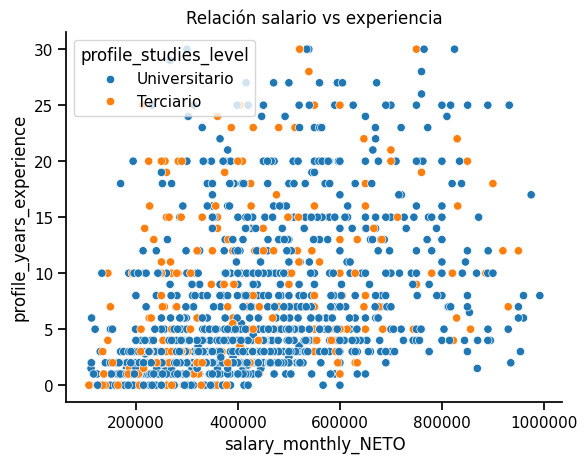

In [30]:
plt.title('Relación salario vs experiencia')
sns.scatterplot(x=dc['salary_monthly_NETO'], y = dc['profile_years_experience'][dc['profile_years_experience'] <= 30].dropna(), hue=dc['profile_studies_level'][(dc['profile_studies_level'] == "Universitario") | (dc['profile_studies_level'] == 'Terciario' ) ] )
plt.ticklabel_format(style='plain', axis='x')
sns.despine()

In [31]:
filtered_data = dc.loc[(dc['profile_studies_level'] == "Universitario") | (dc['profile_studies_level'] == 'Terciario' ) ]
matcov = np.cov(filtered_data['salary_monthly_NETO'], filtered_data['profile_years_experience'])
corr = np.corrcoef(filtered_data['salary_monthly_NETO'], filtered_data['profile_years_experience'])
print('matriz de correlaciones: \n ', corr,'\n')

print('correlación entra ambas variables: ',corr[0,1],'\n')

matriz de correlaciones: 
  [[1.         0.40240627]
 [0.40240627 1.        ]] 

correlación entra ambas variables:  0.4024062658414173 



In [32]:
filtered_data2 = dc.loc[(dc['profile_studies_level'] == "Universitario")]
matcov = np.cov(filtered_data2['salary_monthly_NETO'], filtered_data2['profile_years_experience'])
corr = np.corrcoef(filtered_data2['salary_monthly_NETO'], filtered_data2['profile_years_experience'])
print('matriz de correlaciones: \n ', corr,'\n')

print('correlación entra ambas variables: ',corr[0,1],'\n')

matriz de correlaciones: 
  [[1.         0.42124607]
 [0.42124607 1.        ]] 

correlación entra ambas variables:  0.42124607397881025 



In [33]:
filtered_data2 = dc.loc[(dc['profile_studies_level'] == "Terciario")]
matcov = np.cov(filtered_data2['salary_monthly_NETO'], filtered_data2['profile_years_experience'])
corr = np.corrcoef(filtered_data2['salary_monthly_NETO'], filtered_data2['profile_years_experience'])
print('matriz de correlaciones: \n ', corr,'\n')

print('correlación entra ambas variables: ',corr[0,1],'\n')

matriz de correlaciones: 
  [[1.         0.36052347]
 [0.36052347 1.        ]] 

correlación entra ambas variables:  0.36052346702687654 

